# Classify Raisins with Hyperparameter Tuning Project

- [View Solution Notebook](./solution.html)
- [View Project Page](https://www.codecademy.com/projects/practice/mle-hyperparameter-tuning-project)

### 1. Explore the Dataset

In [1]:
# 1. Setup
# Import necessary libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization

from matplotlib.colors import ListedColormap

# Import scikit-learn modules for model selection and metrics
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

# Import classification algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Import scipy for statistical distributions
from scipy.stats import uniform

# Load the Raisin_Dataset.csv file
raisins = pd.read_csv('Raisin_Dataset.csv')

# Check the dimensions of the dataset
print(f"Dataset dimensions: {raisins.shape}")

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(raisins.head())

# Check the data types of each column
print("\nData types of each column:")
print(raisins.dtypes)

# Check the class distribution
print("\nClass distribution:")
print(raisins['Class'].value_counts())

# Display summary statistics for numerical features
print("\nSummary statistics for numerical features:")
print(raisins.describe())

Dataset dimensions: (900, 8)
First few rows of the dataset:
    Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  87524       442.246011       253.291155      0.819738       90546   
1  75166       406.690687       243.032436      0.801805       78789   
2  90856       442.267048       266.328318      0.798354       93717   
3  45928       286.540559       208.760042      0.684989       47336   
4  79408       352.190770       290.827533      0.564011       81463   

     Extent  Perimeter  Class  
0  0.758651   1184.040      0  
1  0.684130   1121.786      0  
2  0.637613   1208.575      0  
3  0.699599    844.162      0  
4  0.792772   1073.251      0  

Data types of each column:
Area                 int64
MajorAxisLength    float64
MinorAxisLength    float64
Eccentricity       float64
ConvexArea           int64
Extent             float64
Perimeter          float64
Class                int64
dtype: object

Class distribution:
Class
0    450
1    450
Name: count,

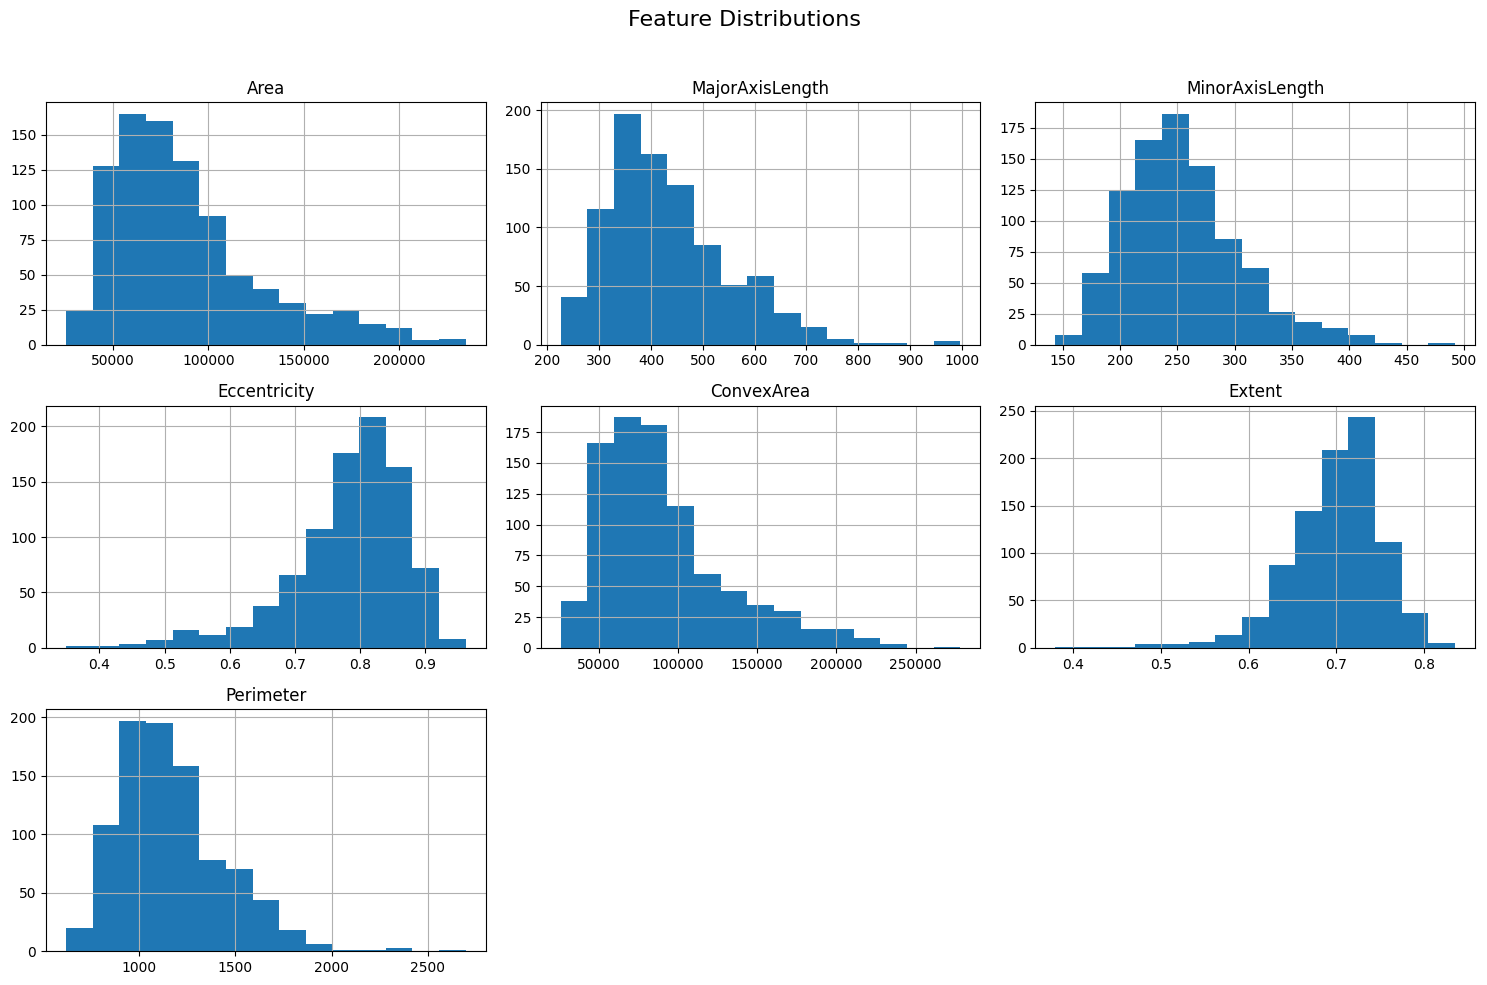

In [2]:
# Visualize feature distributions
numerical_features = raisins.columns[:-1]  # Exclude the 'Class' column
raisins[numerical_features].hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [3]:
# 2. Create predictor and target variables, X and y
# Create predictor (X) and target (y) variables
X = raisins.drop('Class', axis=1)  # Drop the target column to create predictor variables
y = raisins['Class']  # Target variable

# Check class balance
class_counts = y.value_counts()
print("\nClass balance:")
print(class_counts)




Class balance:
Class
0    450
1    450
Name: count, dtype: int64


In [4]:
# 3. Examine the dataset
print(f'There are {len(X.columns)} features in total.')
print(f'There are {len(X)} samples in total.')

There are 7 features in total.
There are 900 samples in total.


In [5]:
# 4. Split the data set into training and testing sets
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=19, stratify=y  # Stratify to maintain class balance
)

# Print the shapes of the resulting datasets
print("\nShapes of the datasets:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")


Shapes of the datasets:
X_train: (720, 7), X_test: (180, 7)
y_train: (720,), y_test: (180,)


### 2. Grid Search with Decision Tree Classifier

In [6]:
# 5. Create a Decision Tree model
tree = DecisionTreeClassifier()

In [7]:
# 6. Dictionary of parameters for GridSearchCV
parameters = {'max_depth': [3, 5, 7],
              'min_samples_split': [2, 3, 4]}

In [8]:
# 7. Create a GridSearchCV model
grid = GridSearchCV(estimator=tree, param_grid=parameters, cv=5, scoring='accuracy', verbose=1)

# Fit the GridSearchCV model to the training data
grid.fit(X_train, y_train)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 3, 4]},
             scoring='accuracy', verbose=1)

In [9]:
# 8. Print the model and hyperparameters obtained by GridSearchCV
best_model = grid.best_estimator_
print("Best hyperparameters obtained by GridSearchCV:")
print(best_model)

# Print the best cross-validation score
print(f"Best cross-validation accuracy: {grid.best_score_ * 100:.2f}%")

# Evaluate the best model on the test data
test_accuracy = best_model.score(X_test, y_test)
print(f"Test accuracy of the best model: {test_accuracy * 100:.2f}%")

Best hyperparameters obtained by GridSearchCV:
DecisionTreeClassifier(max_depth=3, min_samples_split=3)
Best cross-validation accuracy: 85.00%
Test accuracy of the best model: 85.56%


In [10]:
# 9. Print a table summarizing the results of GridSearchCV
cv_results = pd.DataFrame(grid.cv_results_['params'])
cv_results['mean_test_score'] = grid.cv_results_['mean_test_score']
print("\nCross-validation results for each hyperparameter combination:")
print(cv_results)
# params = pd.DataFrame(grid.cv_results_['params'])
# scores = pd.DataFrame(grid.cv_results_['mean_test_score'], columns=['scores'])

# summary = pd.concat([params, scores], axis=1)
# print(summary)


Cross-validation results for each hyperparameter combination:
   max_depth  min_samples_split  mean_test_score
0          3                  2         0.847222
1          3                  3         0.850000
2          3                  4         0.850000
3          5                  2         0.837500
4          5                  3         0.844444
5          5                  4         0.838889
6          7                  2         0.820833
7          7                  3         0.826389
8          7                  4         0.823611


### 2. Random Search with Logistic Regression

In [11]:
# 10. The logistic regression model
lr = LogisticRegression(solver='liblinear', max_iter=1000)

In [12]:
# 11. Define distributions to choose hyperparameters from
distributions = {'penalty': ['l1', 'l2'], 'C': uniform(0, 100)}

In [13]:
# 12. Create a RandomizedSearchCV model
clf = RandomizedSearchCV(estimator=lr, param_distributions=distributions, n_iter=8, cv=5, scoring='accuracy', random_state=19, verbose=1)

# Fit the random search model
clf.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(max_iter=1000,
                                                solver='liblinear'),
                   n_iter=8,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ff342f945c0>,
                                        'penalty': ['l1', 'l2']},
                   random_state=19, scoring='accuracy', verbose=1)

In [14]:
# 13. Print best esimator and best score
best_model = clf.best_estimator_
print("Best hyperparameters obtained by RandomizedSearchCV:")
print(best_model)


# Print the best cross-validation score
print(f"Best cross-validation accuracy: {clf.best_score_ * 100:.2f}%")

# Evaluate the best model on the test data
test_accuracy = best_model.score(X_test, y_test)
print(f"Test accuracy of the best model: {test_accuracy * 100:.2f}%")


Best hyperparameters obtained by RandomizedSearchCV:
LogisticRegression(C=41.27429369608906, max_iter=1000, solver='liblinear')
Best cross-validation accuracy: 86.67%
Test accuracy of the best model: 85.00%


In [15]:
# Print a table summarizing the results of RandomSearchCV
# params = pd.DataFrame(clf.cv_results_['params'])
# scores = pd.DataFrame(clf.cv_results_['mean_test_score'], columns=['scores'])

# summary = pd.concat([params, scores], axis=1)
# print(summary)

cv_results = pd.DataFrame(clf.cv_results_['params'])
cv_results['mean_test_score'] = clf.cv_results_['mean_test_score']
print("\nCross-validation results for each hyperparameter combination:")
print(cv_results)


Cross-validation results for each hyperparameter combination:
           C penalty  mean_test_score
0   9.753360      l2         0.865278
1  41.274294      l2         0.866667
2  13.813169      l2         0.866667
3  67.563267      l1         0.859722
4  67.197708      l2         0.866667
5   0.814826      l1         0.856944
6  63.566073      l2         0.865278
7  84.901482      l2         0.865278


# K-Nearest Neighbors with Grid Search
Implement grid search for a K-Nearest Neighbors classifier. Define parameter grid for n_neighbors, weights, and metric, create GridSearchCV object, fit the model, and evaluate performance.

In [16]:
knn = KNeighborsClassifier()

In [20]:
distributions = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['minkowski', 'euclidean', 'manhattan']  # Distance metric
}

knn_grid = GridSearchCV(estimator=knn, param_grid=distributions, cv=5, scoring='accuracy', verbose=1)
knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [21]:
# 8. Print the model and hyperparameters obtained by GridSearchCV
best_knn_model = knn_grid.best_estimator_
print("Best hyperparameters obtained by GridSearchCV for K-Nearest Neighbors:")
print(best_knn_model)

# Print the best cross-validation score
print(f"Best cross-validation accuracy for K-Nearest Neighbors: {knn_grid.best_score_ * 100:.2f}%")

# Evaluate the best model on the test data
knn_test_accuracy = best_knn_model.score(X_test, y_test)
print(f"Test accuracy of the best K-Nearest Neighbors model: {knn_test_accuracy * 100:.2f}%")

Best hyperparameters obtained by GridSearchCV for K-Nearest Neighbors:
KNeighborsClassifier(n_neighbors=9)
Best cross-validation accuracy for K-Nearest Neighbors: 84.86%
Test accuracy of the best K-Nearest Neighbors model: 85.56%


In [22]:
# params = pd.DataFrame(grid.cv_results_['params'])
# scores = pd.DataFrame(grid.cv_results_['mean_test_score'], columns=['scores'])

# summary = pd.concat([params, scores], axis=1)
# print(summary)

# Ensure the GridSearchCV object is fitted before accessing cv_results_


knn_cv_results = pd.DataFrame(knn_grid.cv_results_['params'])
knn_cv_results['mean_test_score'] = knn_grid.cv_results_['mean_test_score']
print("\nCross-validation results for each hyperparameter combination for K-Nearest Neighbors:")
print(knn_cv_results)


Cross-validation results for each hyperparameter combination for K-Nearest Neighbors:
       metric  n_neighbors   weights  mean_test_score
0   minkowski            3   uniform         0.833333
1   minkowski            3  distance         0.815278
2   minkowski            5   uniform         0.843056
3   minkowski            5  distance         0.826389
4   minkowski            7   uniform         0.841667
5   minkowski            7  distance         0.836111
6   minkowski            9   uniform         0.848611
7   minkowski            9  distance         0.840278
8   minkowski           11   uniform         0.836111
9   minkowski           11  distance         0.844444
10  euclidean            3   uniform         0.833333
11  euclidean            3  distance         0.815278
12  euclidean            5   uniform         0.843056
13  euclidean            5  distance         0.826389
14  euclidean            7   uniform         0.841667
15  euclidean            7  distance         0.83

# Model Comparison and Evaluation
Compare the performance of all tuned models using metrics like accuracy, precision, recall, F1-score, and confusion matrices. Determine which model performs best for the raisin classification task.

In [23]:
# Evaluate Decision Tree Classifier
dt_predictions = grid.best_estimator_.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)
dt_f1 = f1_score(y_test, dt_predictions)
dt_conf_matrix = confusion_matrix(y_test, dt_predictions)

# Evaluate Logistic Regression Classifier
lr_predictions = clf.best_estimator_.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions)
lr_recall = recall_score(y_test, lr_predictions)
lr_f1 = f1_score(y_test, lr_predictions)
lr_conf_matrix = confusion_matrix(y_test, lr_predictions)

# Evaluate K-Nearest Neighbors Classifier
knn_predictions = knn_grid.best_estimator_.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions)
knn_recall = recall_score(y_test, knn_predictions)
knn_f1 = f1_score(y_test, knn_predictions)
knn_conf_matrix = confusion_matrix(y_test, knn_predictions)

In [24]:
# Print evaluation metrics for all models
print("Decision Tree Classifier:")
print(f"Accuracy: {dt_accuracy:.2f}, Precision: {dt_precision:.2f}, Recall: {dt_recall:.2f}, F1-Score: {dt_f1:.2f}")
print("\nLogistic Regression Classifier:")
print(f"Accuracy: {lr_accuracy:.2f}, Precision: {lr_precision:.2f}, Recall: {lr_recall:.2f}, F1-Score: {lr_f1:.2f}")
print("\nK-Nearest Neighbors Classifier:")
print(f"Accuracy: {knn_accuracy:.2f}, Precision: {knn_precision:.2f}, Recall: {knn_recall:.2f}, F1-Score: {knn_f1:.2f}")


Decision Tree Classifier:
Accuracy: 0.86, Precision: 0.86, Recall: 0.86, F1-Score: 0.86

Logistic Regression Classifier:
Accuracy: 0.85, Precision: 0.87, Recall: 0.82, F1-Score: 0.85

K-Nearest Neighbors Classifier:
Accuracy: 0.86, Precision: 0.90, Recall: 0.80, F1-Score: 0.85



Confusion Matrices:
Decision Tree Classifier:


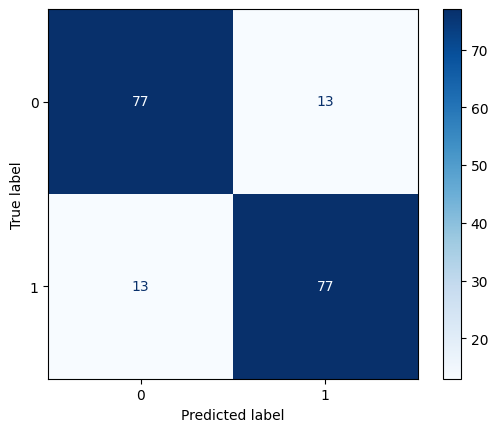

Logistic Regression Classifier:


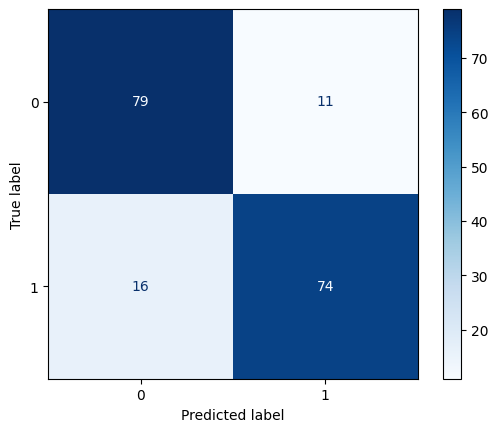

K-Nearest Neighbors Classifier:


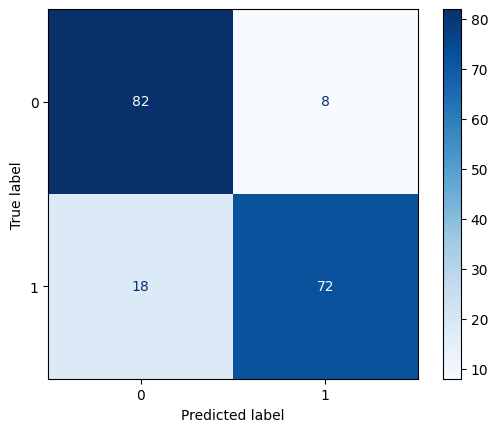

In [25]:
# Display confusion matrices
print("\nConfusion Matrices:")
print("Decision Tree Classifier:")
ConfusionMatrixDisplay(dt_conf_matrix, display_labels=grid.classes_).plot(cmap='Blues')
plt.show()

print("Logistic Regression Classifier:")
ConfusionMatrixDisplay(lr_conf_matrix, display_labels=clf.classes_).plot(cmap='Blues')
plt.show()

print("K-Nearest Neighbors Classifier:")
ConfusionMatrixDisplay(knn_conf_matrix, display_labels=knn_grid.classes_).plot(cmap='Blues')
plt.show()

# Visualize Results
Create visualizations of model performance including bar charts comparing accuracy scores, confusion matrices, and visualizing decision boundaries for the best performing model.

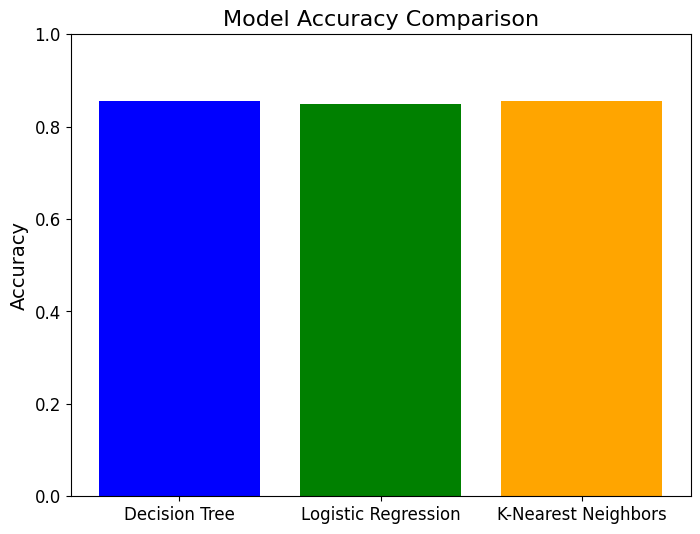

In [26]:
# Bar chart comparing accuracy scores of the models
model_names = ['Decision Tree', 'Logistic Regression', 'K-Nearest Neighbors']
accuracy_scores = [dt_accuracy, lr_accuracy, knn_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracy_scores, color=['blue', 'green', 'orange'])
plt.title('Model Accuracy Comparison', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0, 1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

/home/olavo/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


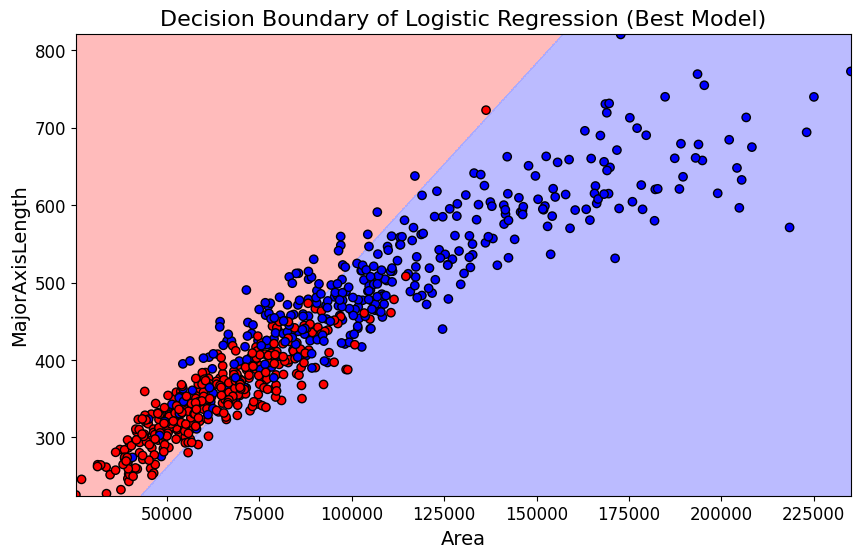

In [28]:
# Select two features for visualization
X_train_2d = X_train.iloc[:, :2]
X_test_2d = X_test.iloc[:, :2]

# Fit the best Logistic Regression model on the reduced feature set
best_model.fit(X_train_2d, y_train)

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X_train_2d.iloc[:, 0].min() - 1, X_train_2d.iloc[:, 0].max() + 1
y_min, y_max = X_train_2d.iloc[:, 1].min() - 1, X_train_2d.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1.0), np.arange(y_min, y_max, 1.0))

# Predict on the mesh grid
Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
plt.scatter(X_train_2d.iloc[:, 0], X_train_2d.iloc[:, 1], c=y_train, edgecolor='k', cmap=ListedColormap(['#FF0000', '#0000FF']))
plt.title('Decision Boundary of Logistic Regression (Best Model)', fontsize=16)
plt.xlabel(X_train_2d.columns[0], fontsize=14)
plt.ylabel(X_train_2d.columns[1], fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()